# Task 2 - Modifying the parameters on LENET-5 Architecture

#### Importing Libraries

In [37]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.nn.modules import AvgPool2d
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Data Preprocessing

In [38]:
BATCH_SIZE = 64

## transformations
transform = transforms.Compose(
    [transforms.Resize((32, 32)), transforms.ToTensor()])

## download and load training dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

## download and load testing dataset
testset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False)

#### Model Train and Test functions

In [39]:
def train(model, train_loader, optimizer, criterion, device):
    model.train()
    train_loss = 0
    correct = 0
    for data, target in train_loader:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)

        # Perform internal one-hot encoding
        target_onehot = F.one_hot(target, num_classes=10).float()

        loss = criterion(output, target_onehot)
        train_loss += loss.item()
        loss.backward()
        optimizer.step()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

    train_loss /= len(train_loader.dataset)
    accuracy = 100. * correct / len(train_loader.dataset)
    return train_loss, accuracy

def test(model, test_loader, criterion, device):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)

            # Perform internal one-hot encoding
            target_onehot = F.one_hot(target, num_classes=10).float()

            loss = criterion(output, target_onehot)
            test_loss += loss.item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, accuracy

#### Adjusted Lenet with 4 Convolutional Layers, 4 FC layers, RELU and MSE Loss

In [40]:
import torch.nn as nn

## Adjusted Lenet with 4 Convolutional Layers, 4 FC layers, RELU and MSE Loss

class LeNet_Adjusted_4cov_4fc(nn.Module):
    def __init__(self):
        super(LeNet_Adjusted_4cov_4fc, self).__init__()
        inch = 1
        self.conv1 = nn.Conv2d(inch, 16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2, stride=2)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(2, stride=2)
        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu4 = nn.ReLU()
        self.pool4 = nn.MaxPool2d(2, stride=2)
        self.fc1 = nn.Linear(128*2*2, 256)  # Correct input size after 4 pooling layers
        self.relu5 = nn.ReLU()
        self.fc2 = nn.Linear(256, 128)
        self.relu6 = nn.ReLU()
        self.fc3 = nn.Linear(128, 64)
        self.relu7 = nn.ReLU()
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.pool3(x)
        x = self.conv4(x)
        x = self.relu4(x)
        x = self.pool4(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu5(x)
        x = self.fc2(x)
        x = self.relu6(x)
        x = self.fc3(x)
        x = self.relu7(x)
        x = self.fc4(x)
        return x


Running  1 out of  10
Epoch [1/10] | Train Loss: 0.0003 | Train Accuracy: 89.22%, Test Loss: 0.0001 | Test Accuracy: 98.43%
Running  2 out of  10
Epoch [2/10] | Train Loss: 0.0000 | Train Accuracy: 98.58%, Test Loss: 0.0000 | Test Accuracy: 98.79%
Running  3 out of  10
Epoch [3/10] | Train Loss: 0.0000 | Train Accuracy: 98.93%, Test Loss: 0.0000 | Test Accuracy: 99.02%
Running  4 out of  10
Epoch [4/10] | Train Loss: 0.0000 | Train Accuracy: 99.12%, Test Loss: 0.0000 | Test Accuracy: 98.95%
Running  5 out of  10
Epoch [5/10] | Train Loss: 0.0000 | Train Accuracy: 99.23%, Test Loss: 0.0000 | Test Accuracy: 99.08%
Running  6 out of  10
Epoch [6/10] | Train Loss: 0.0000 | Train Accuracy: 99.36%, Test Loss: 0.0000 | Test Accuracy: 99.15%
Running  7 out of  10
Epoch [7/10] | Train Loss: 0.0000 | Train Accuracy: 99.48%, Test Loss: 0.0000 | Test Accuracy: 99.05%
Running  8 out of  10
Epoch [8/10] | Train Loss: 0.0000 | Train Accuracy: 99.50%, Test Loss: 0.0000 | Test Accuracy: 99.13%
Running 

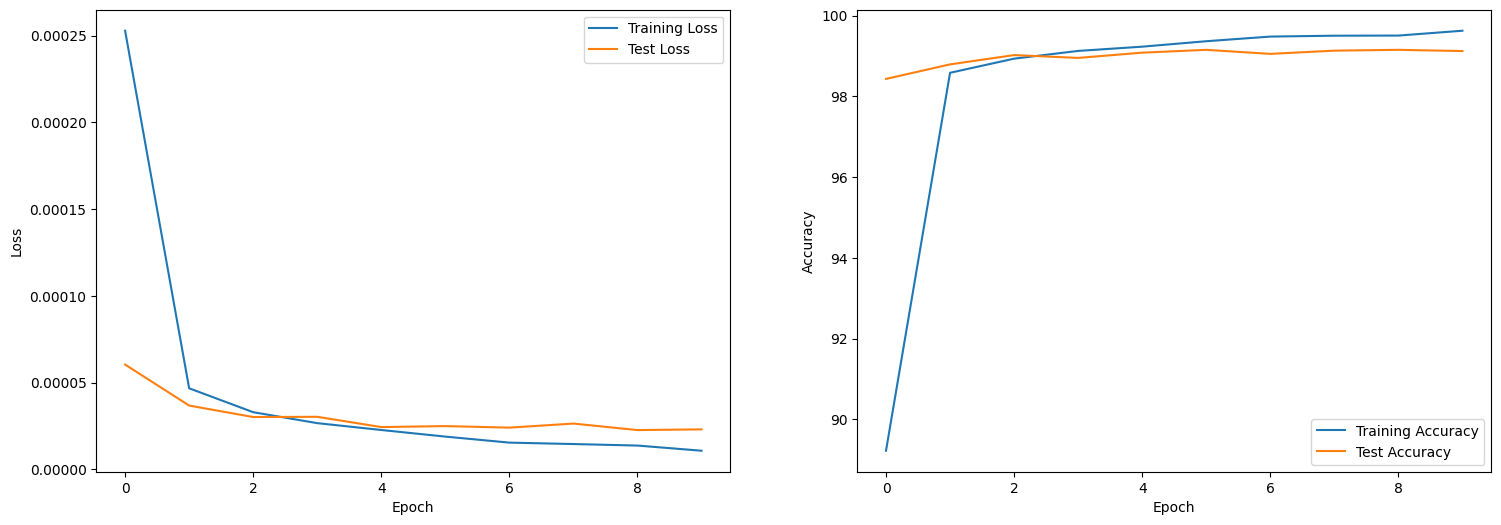

In [41]:
# Training parameters
from torch.types import Device
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = LeNet_Adjusted_4cov_4fc().to(DEVICE)
num_epochs = 10
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# Defining criteria as MSE Loss
criterion = nn.MSELoss()


train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

# Training loop
for epoch in range(num_epochs):
    print("Running ", epoch+1, "out of ", num_epochs)

    train_loss, train_accuracy = train(model, trainloader, optimizer, criterion, DEVICE)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    test_loss, test_accuracy = test(model, testloader, criterion, DEVICE)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}] | '
          f'Train Loss: {train_loss:.4f} | Train Accuracy: {train_accuracy:.2f}%, '
          f'Test Loss: {test_loss:.4f} | Test Accuracy: {test_accuracy:.2f}%')

# Priniting the initial test accuracy
print(f'Initial Test Accuracy: {test_accuracies[0]:.2f}%')
# print(f'Initial Test Accuracy: {test_accuracies[0]:.2f}%')

# Visualize training loss and accuracy trends
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

#### Adjusted Lenet with 3 Convolutional Layers, 3 FC layers, RELU and MSE Loss

In [42]:
## Adjusted Lenet Class which has 3 convolutional Layers and 3 Fully connected layers

import torch.nn as nn

class LeNet_Adjusted_3cov_3fc(nn.Module):
    def __init__(self):
        super(LeNet_Adjusted_3cov_3fc, self).__init__()
        inch = 1
        self.conv1 = nn.Conv2d(inch, 16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2, stride=2)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(2, stride=2)
        self.fc1 = nn.Linear(1024, 128)  # Correct input size
        self.relu4 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu5 = nn.ReLU()
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.pool3(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu4(x)
        x = self.fc2(x)
        x = self.relu5(x)
        x = self.fc3(x)
        return x


In [43]:
# Training parameters
from torch.types import Device
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = LeNet_Adjusted_3cov_3fc().to(DEVICE)
num_epochs = 10
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# Defining criteria as MSE Loss
criterion = nn.MSELoss()


train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

# Training loop
for epoch in range(num_epochs):
    print("Running Epoch", epoch+1, "out of ", num_epochs)

    train_loss, train_accuracy = train(model, trainloader, optimizer, criterion, DEVICE)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    test_loss, test_accuracy = test(model, testloader, criterion, DEVICE)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}] | '
          f'Train Loss: {train_loss:.4f} | Train Accuracy: {train_accuracy:.2f}%, '
          f'Test Loss: {test_loss:.4f} | Test Accuracy: {test_accuracy:.2f}%')

# Priniting the initial test accuracy
print(f'Initial Test Accuracy: {test_accuracies[0]:.2f}%')
# print(f'Initial Test Accuracy: {test_accuracies[0]:.2f}%')



Running Epoch 1 out of  10
Epoch [1/10] | Train Loss: 0.0002 | Train Accuracy: 94.34%, Test Loss: 0.0001 | Test Accuracy: 98.92%
Running Epoch 2 out of  10
Epoch [2/10] | Train Loss: 0.0000 | Train Accuracy: 98.86%, Test Loss: 0.0000 | Test Accuracy: 99.11%
Running Epoch 3 out of  10
Epoch [3/10] | Train Loss: 0.0000 | Train Accuracy: 99.14%, Test Loss: 0.0000 | Test Accuracy: 99.14%
Running Epoch 4 out of  10
Epoch [4/10] | Train Loss: 0.0000 | Train Accuracy: 99.30%, Test Loss: 0.0000 | Test Accuracy: 99.19%
Running Epoch 5 out of  10
Epoch [5/10] | Train Loss: 0.0000 | Train Accuracy: 99.45%, Test Loss: 0.0000 | Test Accuracy: 99.04%
Running Epoch 6 out of  10
Epoch [6/10] | Train Loss: 0.0000 | Train Accuracy: 99.57%, Test Loss: 0.0000 | Test Accuracy: 99.14%
Running Epoch 7 out of  10
Epoch [7/10] | Train Loss: 0.0000 | Train Accuracy: 99.62%, Test Loss: 0.0000 | Test Accuracy: 99.29%
Running Epoch 8 out of  10
Epoch [8/10] | Train Loss: 0.0000 | Train Accuracy: 99.72%, Test Loss:

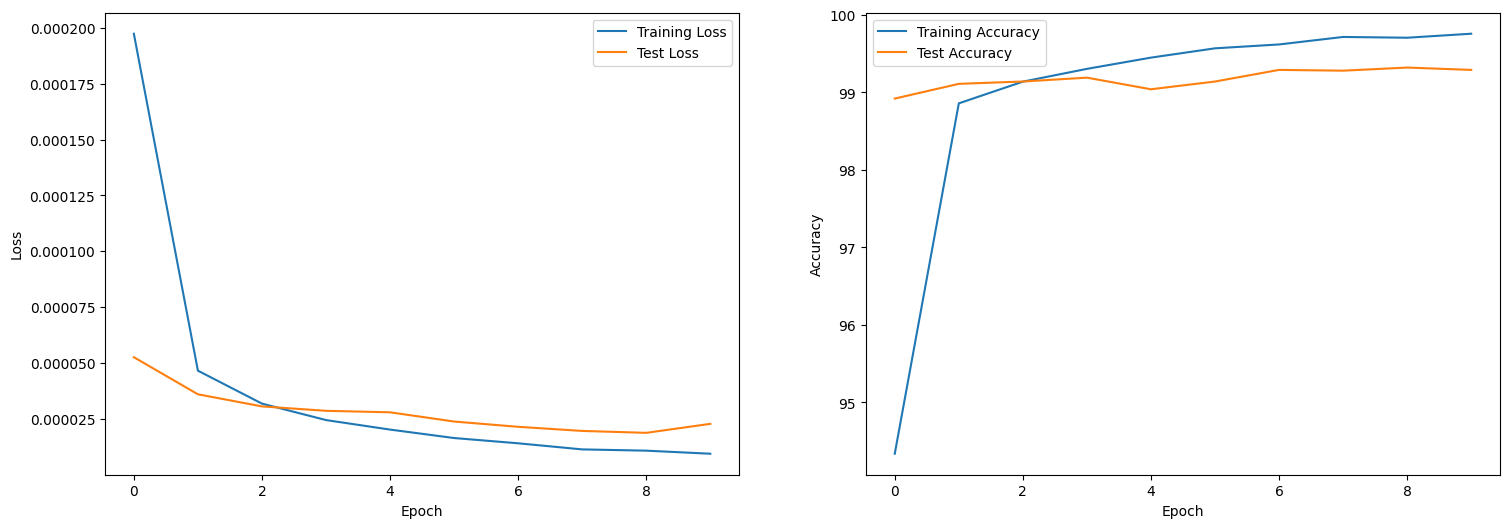

In [45]:
#Plot for 3 cov, 3 fc, RELU, MSE code

# Visualize training loss and accuracy trends
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

#### Adjusted Lenet with 4 Convolutional Layers, 2 FC layers, RELU and MSE Loss

In [46]:
import torch.nn as nn

class LeNet_Adjusted_4cov_2fc(nn.Module):
    def __init__(self):
        super(LeNet_Adjusted_4cov_2fc, self).__init__()
        inch = 1
        self.conv1 = nn.Conv2d(inch, 16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2, stride=2)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(2, stride=2)
        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu4 = nn.ReLU()
        self.pool4 = nn.MaxPool2d(2, stride=2)
        self.fc1 = nn.Linear(128*2*2, 256)  # Adjust input size after 4 pooling layers
        self.relu5 = nn.ReLU()
        self.fc2 = nn.Linear(256, 10)  # Output layer with 10 classes

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.pool3(x)
        x = self.conv4(x)
        x = self.relu4(x)
        x = self.pool4(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu5(x)
        x = self.fc2(x)
        return x


Running  1 out of  10
Epoch [1/10] | Train Loss: 0.0002 | Train Accuracy: 94.21%, Test Loss: 0.0001 | Test Accuracy: 98.87%
Running  2 out of  10
Epoch [2/10] | Train Loss: 0.0000 | Train Accuracy: 99.02%, Test Loss: 0.0000 | Test Accuracy: 99.25%
Running  3 out of  10
Epoch [3/10] | Train Loss: 0.0000 | Train Accuracy: 99.30%, Test Loss: 0.0000 | Test Accuracy: 99.36%
Running  4 out of  10
Epoch [4/10] | Train Loss: 0.0000 | Train Accuracy: 99.49%, Test Loss: 0.0000 | Test Accuracy: 99.24%
Running  5 out of  10
Epoch [5/10] | Train Loss: 0.0000 | Train Accuracy: 99.62%, Test Loss: 0.0000 | Test Accuracy: 99.41%
Running  6 out of  10
Epoch [6/10] | Train Loss: 0.0000 | Train Accuracy: 99.69%, Test Loss: 0.0000 | Test Accuracy: 99.39%
Running  7 out of  10
Epoch [7/10] | Train Loss: 0.0000 | Train Accuracy: 99.75%, Test Loss: 0.0000 | Test Accuracy: 99.50%
Running  8 out of  10
Epoch [8/10] | Train Loss: 0.0000 | Train Accuracy: 99.80%, Test Loss: 0.0000 | Test Accuracy: 99.51%
Running 

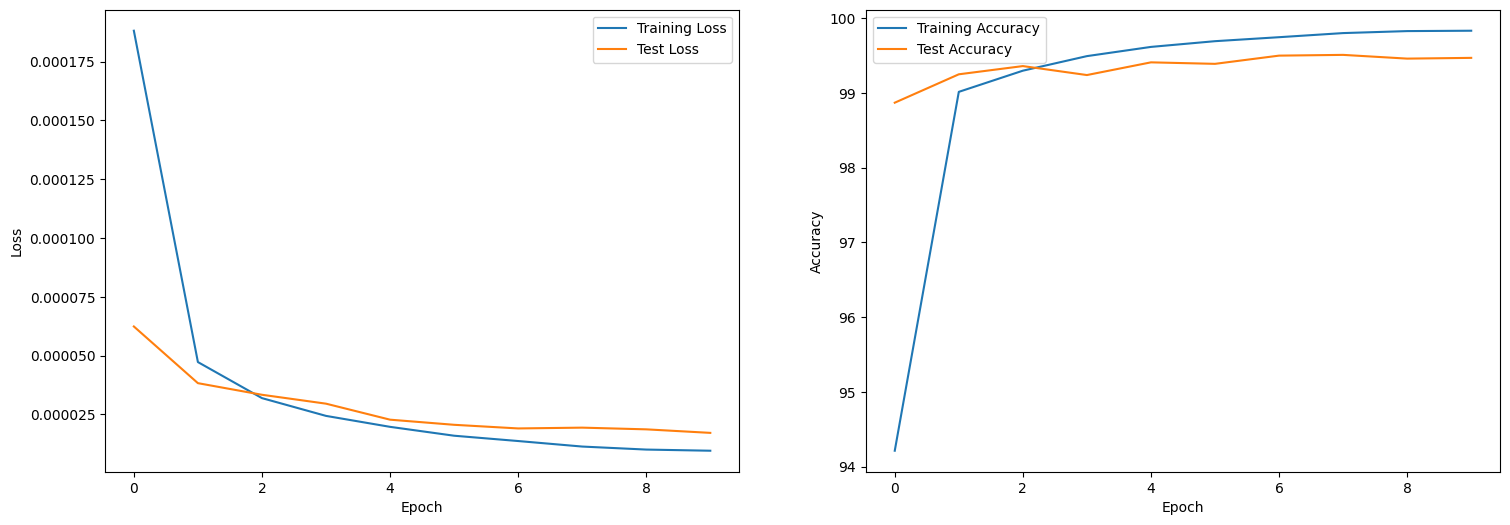

In [47]:
# Training parameters
from torch.types import Device
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = LeNet_Adjusted_4cov_2fc().to(DEVICE)
num_epochs = 10
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# Defining criteria as MSE Loss
criterion = nn.MSELoss()


train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

# Training loop
for epoch in range(num_epochs):
    print("Running ", epoch+1, "out of ", num_epochs)

    train_loss, train_accuracy = train(model, trainloader, optimizer, criterion, DEVICE)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    test_loss, test_accuracy = test(model, testloader, criterion, DEVICE)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}] | '
          f'Train Loss: {train_loss:.4f} | Train Accuracy: {train_accuracy:.2f}%, '
          f'Test Loss: {test_loss:.4f} | Test Accuracy: {test_accuracy:.2f}%')

# Priniting the initial test accuracy
print(f'Initial Test Accuracy: {test_accuracies[0]:.2f}%')
# print(f'Initial Test Accuracy: {test_accuracies[0]:.2f}%')

# Visualize training loss and accuracy trends
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

#### Adjusted Lenet with 3 Convolutional Layers, 2 FC layers, RELU and MSE Loss

In [48]:
import torch.nn as nn

class LeNet_Adjusted_3cov_2fc(nn.Module):
    def __init__(self):
        super(LeNet_Adjusted_3cov_2fc, self).__init__()
        inch = 1
        self.conv1 = nn.Conv2d(inch, 16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2, stride=2)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(2, stride=2)
        self.fc1 = nn.Linear(64 * 4 * 4, 128)  # Adjust input size after 3 pooling layers
        self.relu4 = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)  # Output layer with 10 classes

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.pool3(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu4(x)
        x = self.fc2(x)
        return x


Running  1 out of  10
Epoch [1/10] | Train Loss: 0.0002 | Train Accuracy: 95.14%, Test Loss: 0.0001 | Test Accuracy: 98.82%
Running  2 out of  10
Epoch [2/10] | Train Loss: 0.0001 | Train Accuracy: 98.88%, Test Loss: 0.0001 | Test Accuracy: 99.19%
Running  3 out of  10
Epoch [3/10] | Train Loss: 0.0001 | Train Accuracy: 99.23%, Test Loss: 0.0000 | Test Accuracy: 99.26%
Running  4 out of  10
Epoch [4/10] | Train Loss: 0.0000 | Train Accuracy: 99.36%, Test Loss: 0.0000 | Test Accuracy: 99.23%
Running  5 out of  10
Epoch [5/10] | Train Loss: 0.0000 | Train Accuracy: 99.47%, Test Loss: 0.0000 | Test Accuracy: 99.28%
Running  6 out of  10
Epoch [6/10] | Train Loss: 0.0000 | Train Accuracy: 99.56%, Test Loss: 0.0000 | Test Accuracy: 99.19%
Running  7 out of  10
Epoch [7/10] | Train Loss: 0.0000 | Train Accuracy: 99.61%, Test Loss: 0.0000 | Test Accuracy: 99.29%
Running  8 out of  10
Epoch [8/10] | Train Loss: 0.0000 | Train Accuracy: 99.64%, Test Loss: 0.0000 | Test Accuracy: 99.38%
Running 

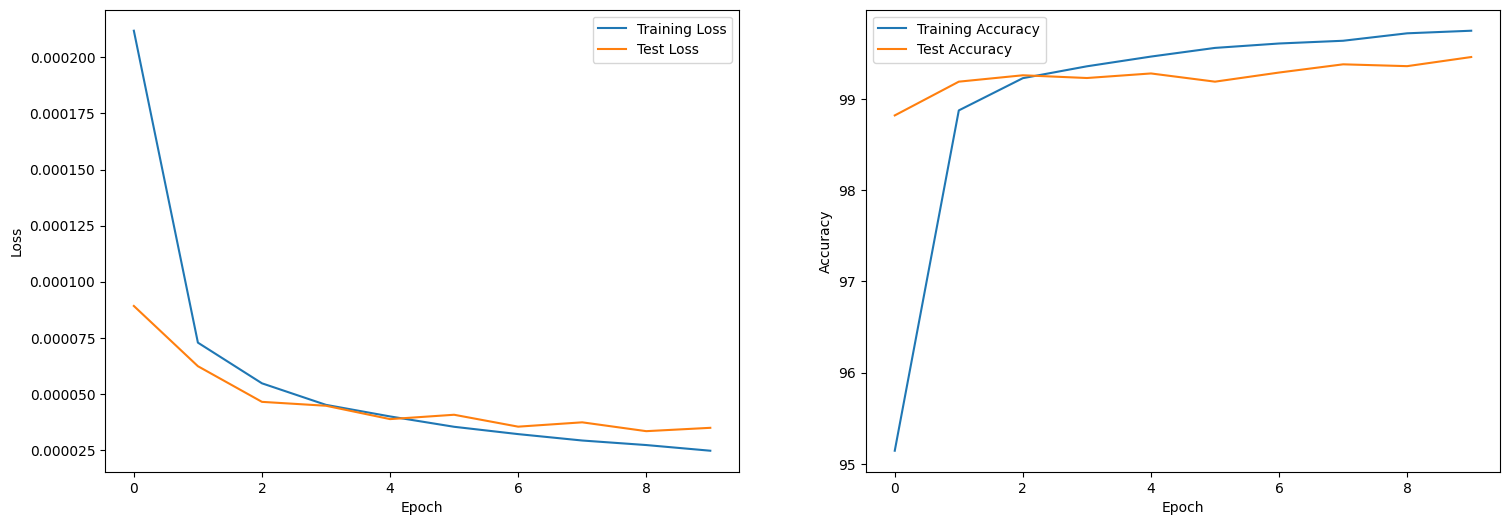

In [49]:
# Training parameters
from torch.types import Device
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = LeNet_Adjusted_3cov_2fc().to(DEVICE)
num_epochs = 10
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# Defining criteria as MSE Loss
criterion = nn.MSELoss()


train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

# Training loop
for epoch in range(num_epochs):
    print("Running ", epoch+1, "out of ", num_epochs)

    train_loss, train_accuracy = train(model, trainloader, optimizer, criterion, DEVICE)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    test_loss, test_accuracy = test(model, testloader, criterion, DEVICE)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}] | '
          f'Train Loss: {train_loss:.4f} | Train Accuracy: {train_accuracy:.2f}%, '
          f'Test Loss: {test_loss:.4f} | Test Accuracy: {test_accuracy:.2f}%')

# Priniting the initial test accuracy
print(f'Initial Test Accuracy: {test_accuracies[0]:.2f}%')
# print(f'Initial Test Accuracy: {test_accuracies[0]:.2f}%')

# Visualize training loss and accuracy trends
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

##### Note: Discussed Task 2 with Sumeet Pachauri and it was interesting to know his insights